# Modifying Data in-place


In [1]:
print("EEG Signal Processing MNE Tutorials: Modifying Data in-place")

EEG Signal Processing MNE Tutorials: Modifying Data in-place


In [2]:
import mne

sample_data_folder = mne.datasets.sample.data_path()
sample_data_raw_file = sample_data_folder / 'MEG' / 'sample' / 'sample_audvis_raw.fif'

# the preload flag loads the data into memory now
raw = mne.io.read_raw_fif(sample_data_raw_file, preload = True)
raw.crop(tmax = 10.0)       # raw.crop() always happens in-place

Opening raw data file /Users/qbit-glitch/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Reading 0 ... 166799  =      0.000 ...   277.714 secs...


<Raw | sample_audvis_raw.fif, 376 x 6007 (10.0 s), ~20.5 MiB, data loaded>

## Signal Processing

Built-in methods for filtering : 
- high, low and bandpass filters (`filter`)
- band-stop filters (`notch_filter`)
- hilbert transforms (`apply_hilbert`)
- user-defined functions (`apply_function`)

They always modify the data in-place. So if we want to preserve the unprocessed data, we must first make a copy for it.



In [5]:
original_raw = raw.copy()

original_raw.info['nchan']

376

In [7]:
original_raw = raw.copy()
raw.apply_hilbert()
print(f"Original data type was: {original_raw.get_data().dtype}, after \n",
      f"apply_hilbert the data type was changed to {raw.get_data().dtype}")

Original data type was: float64, after 
 apply_hilbert the data type was changed to complex128


## Channel picking

Another group of methods where data is modified in-place -> channel picking methods

NOTE: when picking only EEG channels, projectors that affected only the magnetometers were dropped, since there are no longer any magnetometer channels.

In [8]:
print(f"Original Data had: {original_raw.info['nchan']} channels")
original_raw.pick('eeg')        # selects only the eeg channels in-place
print(f"After picking, it has {original_raw.info['nchan']} channels")

Original Data had: 376 channels
After picking, it has 60 channels


## The Copy parameter

When using certain MNE-Python functions, we need not call the `copy()` method separately. We can pass `copy=True` as a parameter to those functions (returns a modified copy of the data).

Some functions include : 
- `mne.set_eeg_reference`
- `mne.pick_info`


[mne.Info datastructure](https://mne.tools/stable/auto_tutorials/intro/30_info.html#tut-info-class)

EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Using matplotlib as 2D backend.


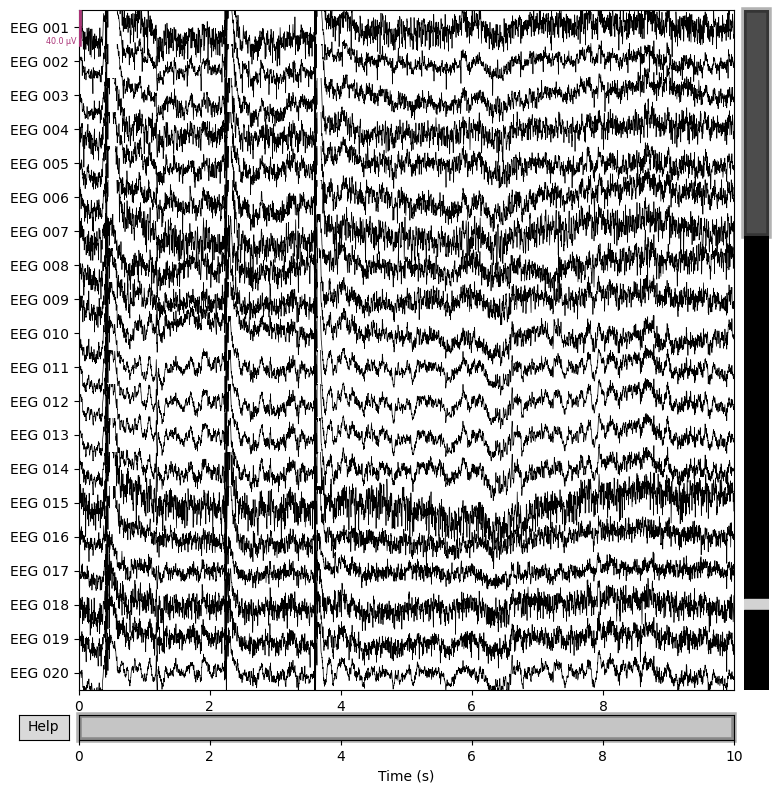

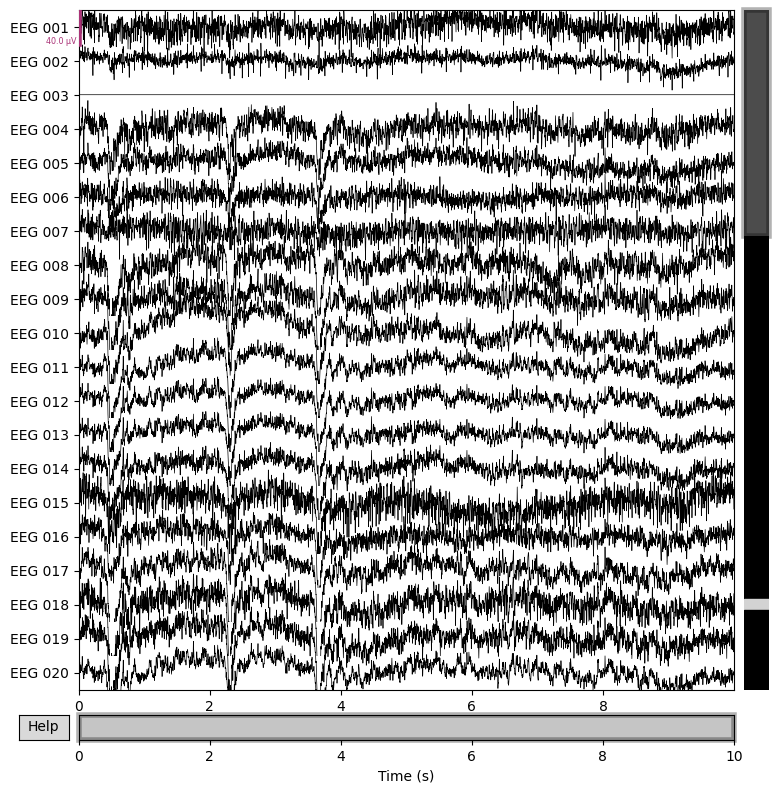

In [9]:
rereferenced_raw, ref_data = mne.set_eeg_reference(original_raw, ['EEG 003'], copy=True)
fig_orig = original_raw.plot()
fig_reref = rereferenced_raw.plot()

Generally speaking, you should expect that methods of data objects will operate in-place, and functions that take a data object as a parameter will operate on a copy of the data (unless the function has a copy parameter and it defaults to False or you specify copy=False). During the exploratory phase of your analysis, where you might want to try out the effects of different data cleaning approaches, you should get used to patterns like `raw.copy().filter(...).plot()` or `raw.copy().apply_proj().compute_psd().plot()` if you want to avoid having to re-load data and repeat earlier steps each time you change a computation (see the [In-place operation](https://mne.tools/stable/documentation/design_philosophy.html#in-place-operation) section for more info on method chaining).

Because neuroimaging datasets can be quite large, MNE-Python tries very hard to avoid making unnecessary copies of your data behind-the-scenes. To further improve memory efficiency, many object methods operate in-place (and silently return their object to allow method chaining). In-place operation may lead you to frequent use of the copy() method during interactive, exploratory analysis — so you can try out different preprocessing approaches or parameter settings without having to re-load the data each time — but it can also be a big memory-saver when applying a finished script to dozens of subjects’ worth of data.